# Expected Rate of Return Analysis of *Weight Watchers International, Inc.* (NASDAQ:WTW)

## By: Dillon Graveline

*Note: I am using Python 3.7.3 for my calculations.*

## The CAPM Formula for Expected Return:

$$ r_j = r_{RF}+\beta_j(r_M - r_{RF})$$

*where*

$r_j$ = Expected Return of Stock j

$r_{RF}$ = The Risk-Free Rate

$\beta_j$ = The Beta of Stock j

$r_M$ = The Return on the Market

## An Analysis of *Weight Watchers International, Inc.*

*Weight Watchers International, Inc.* trades on the NASDAQ and is not a part of the Standard & Poor's 500 Index (*S&P500*). According to their annual report, "[They] are a global wellness company and the world’s leading commercial weight management program. [They] are focused on inspiring people to adopt healthy habits for real life. With over five decades of weight management experience, expertise and know-how, [they] have established Weight Watchers as one of the most recognized and trusted brand names among weight-conscious consumers." (Source: WTW's [10-K filing with the SEC](https://www.sec.gov/Archives/edgar/data/105319/000156459019004487/wtw-10k_20181229.htm)).

In order to calculate the expected rate of return of WTW, I need to gather the variables that comprise the CAPM formula stated above (assuming that stock j is WTW).

All calculations were completed on April 16th, 2019.

### The Risk-Free Rate

#### Obtaining the statistic

I will be using U.S. Treasury securities to obtain the risk-free rate. This is because the U.S. government has never defaulted on its debt obligations. While it is not 100% risk free, it comes pretty close. I will be using the 10 year U.S. Treasury bond yield. The reason why I am using the 10 year yield in favour of other time frames is because it best matches my investment horizon for this stock. Also, it eliminates potential interest rate re-investment risk that would be present with shorter maturities. I am obtaining this statistic directly from the [U.S. Department of the Treasury](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yield)'s webpage. The yield for a 10 year U.S. Treasury bond is **2.60%**.

#### Conclusion

Since the data is coming directly from the [U.S. Department of the Treasury](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yield), there is no need to double check it. I will store this value under the risk_free variable to be used in the CAPM calculation.

$r_{RF}:$

In [1]:
risk_free =  2.60

### The Return on the Market

Instead of analyzing a portfolio that owns every single stock or security, I will use the *S&P500* index because it is a heavily diversified index that performs extremely similar to the market as a whole.

In order to caluclate the return on the market, I will find the average annual return of the *S&P500* over 20 years. I used a 20 year horizon because it covers several business cycles. Given the extremely long current bull market (10 years plus) anything less than 20 years would provide a skewed result for return on the market. For example, if I set the time frame to 10 years, I get a **19.28%** return for the market which is an unreasonable result compared to long term market returns.

<div style=”page-break-after: always;”></div>

#### First I will grab historical data from the *Yahoo Finance API* with a time interval of 20 years.

In [2]:
# Import modules
import pandas as pd
from pandas_datareader import data
import statsmodels.api as sm
from datetime import datetime

# Define variables
start_date = datetime(1999, 4, 16) # April 16, 1999
end_date = datetime(2019, 4, 16) # April 16, 2019

# Grab historical data from the Yahoo Finance API
ignore_me = data.DataReader('NVDA', 'yahoo', start_date, end_date) # Nonsense DataFrame to start the socket
sp_500 = data.DataReader('^GSPC', 'yahoo', start_date, end_date) # ^GSPC is the ticker for the S&P500 Index
sp_500 = sp_500.drop(['High','Low','Open','Volume','Adj Close'], axis =1)
print('Here are the first 5 rows of the DataFrame containing daily closing prices of the S&P500 for 20 years.')
print('')
print(sp_500.head())

Here are the first 5 rows of the DataFrame containing daily closing prices of the S&P500 for 20 years.

                  Close
Date                   
1999-04-16  1319.000000
1999-04-19  1289.479980
1999-04-20  1306.170044
1999-04-21  1336.119995
1999-04-22  1358.819946


#### Next, I will convert these prices to daily percentage changes.

In [3]:
# Convert to percentage change
daily_returns = sp_500.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0)
print(clean_daily_returns.head())

               Close
Date                
1999-04-19 -0.022381
1999-04-20  0.012943
1999-04-21  0.022930
1999-04-22  0.016989
1999-04-23 -0.001450


#### Now, I will take the arithmetic average of all daily returns and multiply by 365 days to obtain the average annual return of the market over 20 years.

In [4]:
daily_mean = (clean_daily_returns['Close'].mean())*100
daily_mean_display = str(round((daily_mean), 3))
print('Average Daily Returns: '+daily_mean_display+"%")
annual_returns = daily_mean*365
annual_returns_display = str(round((annual_returns),3))
print('Average Annual Returns: '+annual_returns_display+'%')

Average Daily Returns: 0.023%
Average Annual Returns: 8.334%


#### Conclusion

According to the analysis, the average annual return of the *S&P500* index is **8.352%** over a period of 20 years. Therefore, I will set $r_M$ to the annual_returns variable that I calculated above.

$r_M:$

In [5]:
mkt_return = annual_returns

### The Beta of WTW

A quick check on [Yahoo Finance](https://finance.yahoo.com/quote/WTW/) gives a $\beta$ (3Y Monthly) of 0.90. However, [Reuters](https://www.reuters.com/finance/stocks/overview/WTW.OQ) displays a $\beta$ of 2.39. Also, [Market Watch](https://www.marketwatch.com/investing/stock/wtw) shows a $\beta$ of 1.49. Which one is correct and how can there be such a huge discrepancy between the three?

In order to answer this question, I will use regression analysis, as shown in the textbook handout distributed in class, to calculate the $\beta$.

I will be using this formula to calculate $\beta:$

$$\beta = \dfrac{\textrm{Covariance}(r_j,r_M)}{\textrm{Variance}(r_M)}$$

#### First, I will grab historical data from the Yahoo Finance API with a time interval of 3 years.

In [6]:
# Define variables
start_date = datetime(2016, 4, 16) #April 16, 2016
end_date = datetime(2019, 4, 16) #April 16, 2019

# Grab historical data from the Yahoo Finance API
wtw = data.DataReader('wtw', 'yahoo', start_date, end_date)
sp_500 = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

#### Here is the first 5 entries of our DataFrame comparing prices of *WTW* and the *S&P500*:

In [7]:
# Join the closing prices of the two DataFrames 
daily_prices = pd.concat([wtw['Close'], sp_500['Close']], axis=1)
daily_prices.columns = ['WTW', '^GSPC']

# Check the head of the DataFrame
print(daily_prices.head())

              WTW        ^GSPC
Date                          
2016-04-18  15.04  2094.340088
2016-04-19  14.78  2100.800049
2016-04-20  14.61  2102.399902
2016-04-21  14.61  2091.479980
2016-04-22  14.47  2091.580078


#### Here is the first 5 entries of our DataFrame comparing daily returns of *WTW* and the *S&P500*:

In [8]:
# Calculate daily returns
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0)  # Drop first missing row
print(clean_daily_returns.head())

                 WTW     ^GSPC
Date                          
2016-04-19 -0.017287  0.003084
2016-04-20 -0.011502  0.000762
2016-04-21  0.000000 -0.005194
2016-04-22 -0.009582  0.000048
2016-04-25 -0.007602 -0.001812


#### Now that we have a DataFrame with all of the monthly returns, we can analyze $\beta$ using an Ordinary Least Square (OLS) Regression (aka linear regression). 

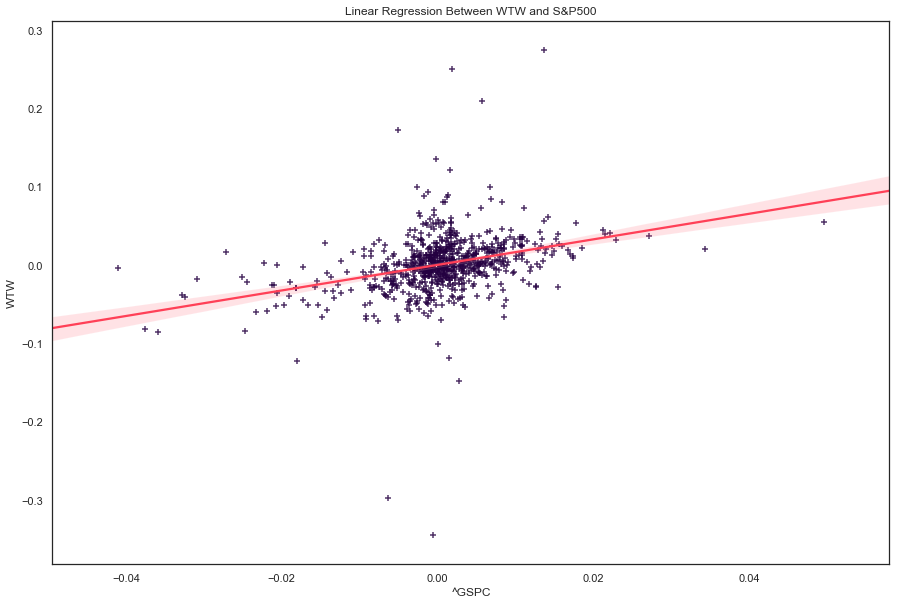

In [9]:
# Plot data
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style ='white')
plt.subplots(figsize=(15,10))
ax = sns.regplot(x='^GSPC', y='WTW', data=clean_daily_returns, color = '#240041', marker = "+", line_kws={'color':'#ff4057'}).set_title('Linear Regression Between WTW and S&P500')

In [10]:
# Define dependent and independent variables
X = clean_daily_returns['^GSPC']
y = clean_daily_returns['WTW']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Make a regression model 
model = sm.OLS(y, X1)

# Fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    WTW   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     94.16
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           4.68e-21
Time:                        21:34:53   Log-Likelihood:                 1434.9
No. Observations:                 755   AIC:                            -2866.
Df Residuals:                     753   BIC:                            -2857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.266      0.7

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Conclusion

According to the analysis, the $\beta$ of WTW is **1.63** (under coef for ^GSPC). This is very similar to the $\beta$ listed on Market Watch. This intuitively makes sense for a stock like WTW. When the economy is doing well and people are making money in the markets, they tend to also focus on making themselves better (losing weight). So we can expect WTW to perform well when the market is performing well. Other more defensive stocks like cigarette companies tend to do better when the market is doing poorly. Therefore, we will set $\beta_{j}$ to **1.6309** (from the calculation) in our CAPM calculation:

In [11]:
wtw_beta = 1.6309

### The Final Calculation

The final calculation combines all of the previous variables we have gathered so far into the CAPM equation in order to find out the expected return.

Just to recap, the CAPM formula is:

$$ r_j = r_{RF}+\beta_j(r_M - r_{RF})$$

By plugging in our variables, we get:

$$ r_j = 2.60 + 1.63 (8.35 - 2.60)$$

$r_{j}:$

In [12]:
expected_return = risk_free + wtw_beta*(mkt_return - risk_free)
expected_return_display = str(round(expected_return, 2))
print("Expected Return of WTW: "+expected_return_display+'%')

Expected Return of WTW: 11.95%


Based on the calculations above for $r_{j}$, the expected rate of return for *Weight Watchers International, Inc.* is **11.98%**.

## Problems Encountered

Since the instructions were fairly vague for this assignement, I had to fundamentally understand the CAPM model on a deep level. While I could have used pen and paper to do the calculations, it would result in a superficial understanding of the model. I combined my passion for statistics and scripting languages by using python to do the calculations. I decided to use Python 3.7.3 intead of Excel because there are many modules available for analyzing securities and also for the flexibility it provides. I encountered problems when I had to use several modules that I had not been familiar with before the assignment. These modules are: seaborn and statsmodels. Luckily, these modules provide in depth documentation that explains each function in detail. After reading through the documentation, I was able to understand how DataFrames worked and how to do an Ordinary Least Square (OLS) Regression.

## Sources

WTW's 10-K filing with the SEC on December 29, 2018: https://www.sec.gov/Archives/edgar/data/105319/000156459019004487/wtw-10k_20181229.htm

U.S. Department of the Treasury's daily treasury yield curve rates: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yield

WTW's Yahoo Finance quote: https://finance.yahoo.com/quote/WTW/

WTW's Reuters quote: https://www.reuters.com/finance/stocks/overview/WTW.OQ

WTW's Market Watch quote: https://www.marketwatch.com/investing/stock/wtw

The Yahoo Finance API

Python 3's Documentation: https://docs.python.org/3/

Seaborn's Documentation: https://seaborn.pydata.org/

Pandas' Documentation: https://pandas.pydata.org/pandas-docs/stable/?v=20190416205407

StatsModels' Documentation: https://www.statsmodels.org/stable/index.html

## Software Used

Python 3.73 MacOSX

Jupyter

Seaborn

Pandas

Pandas_DataReader

StatsModels

matplotlib

fix-yahoo-finance 0.1.25